In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('movie_metadata.csv')

In [3]:
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
data.shape

(5043, 28)

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

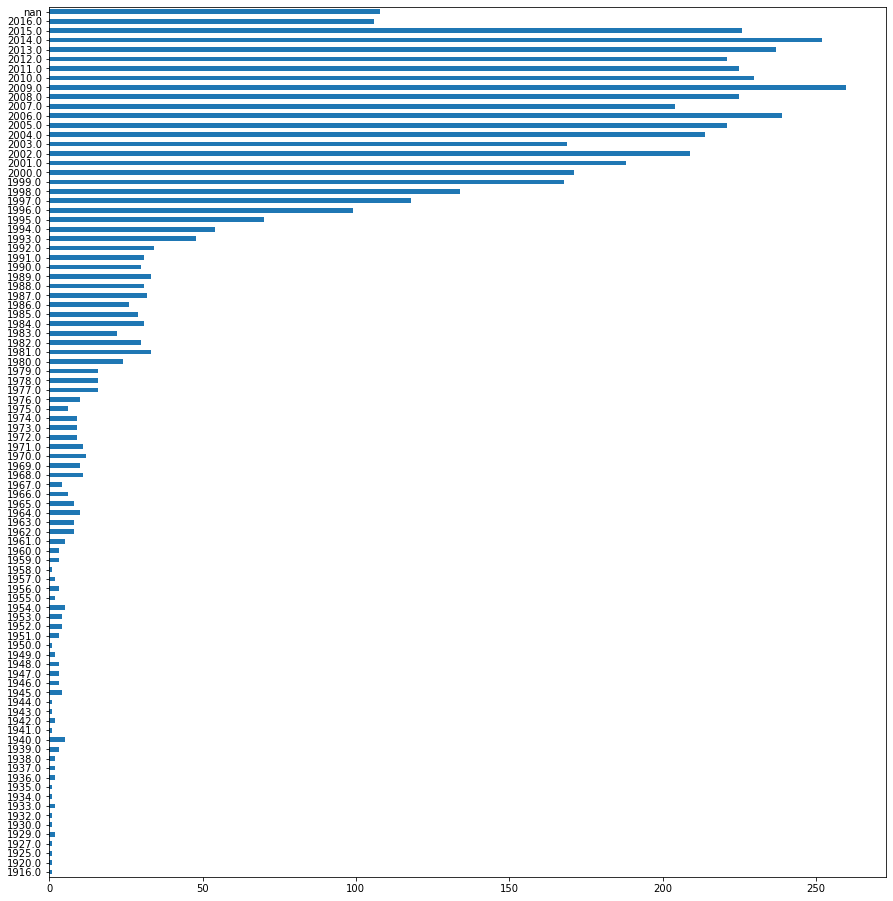

In [6]:
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [8]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [9]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [11]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [12]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [15]:
data['genres'] = data['genres'].str.replace('|', ' ')

In [16]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [17]:
data['movie_title'] = data['movie_title'].str.lower()

In [18]:
# null terminating char at the end
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [19]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [20]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [21]:
data.to_csv('data.csv',index=False)

In [39]:
credits = pd.read_csv('credits.csv')

In [40]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a3...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', ...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a92514...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', '...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': ...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', '...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gend...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': '5894a909925141427e0079a5...","[{'credit_id': '5894a97d925141426c00818c', 'department': 'Directing', '...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela', 'credit_id': '52fe4af1...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'department': 'Directing', '...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'credit_id': '52fe4776c3a368...","[{'credit_id': '52fe4776c3a368484e0c8387', 'department': 'Directing', '...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': '52fe4ea59251416c7515d7d5...","[{'credit_id': '533bccebc3a36844cf0011a7', 'department': 'Directing', '...",227506


In [41]:
meta = pd.read_csv('movies_metadata.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [43]:

meta['year'] = meta['release_date'].dt.year

In [44]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [45]:
# Getting only 2017 movies as we already have movies up to the year 2016 in preprocessing 1 file. 
# We don't have enough data for the movies from 2018, 2019 and 2020. 
# We'll deal with it in the upcoming preprocessing files
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [46]:

new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0


In [47]:
new_meta['id'] = new_meta['id'].astype(int)

In [48]:
data = pd.merge(new_meta, credits, on='id')

In [49]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


In [50]:
# evaluates an expression node or a string containing a Python literal or container display
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [51]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [52]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [53]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [54]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [55]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [56]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [57]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [58]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [59]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [60]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [61]:
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [62]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [63]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [64]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [65]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [66]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [67]:
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [68]:
movie = movie.dropna(how='any')

In [69]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [70]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [71]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [72]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [73]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [74]:
old = pd.read_csv('data.csv')

In [75]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [77]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [78]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thr...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror ...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [79]:
new = old.append(movie)

In [80]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [81]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [82]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [85]:
new.to_csv('new_data.csv',index=False)

## Extracting features of 2018 movies from Wikipedia

In [2]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [3]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [4]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6]
...,...,...,...,...,...,...
263,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,[162]
264,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,[136]
265,DECEMBER,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,[223]
266,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",[256]


In [5]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'YOUR_API_KEY_HERE' #insert you api from tmdb account

In [6]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

In [7]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [8]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],Mystery Horror Thriller
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4],Action Thriller
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],Drama History Western
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],Action Thriller
...,...,...,...,...,...,...,...
263,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,[162],Mystery Adventure Comedy Crime
264,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,[136],Thriller Science Fiction Action Adventure
265,DECEMBER,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,[223],Drama History
266,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",[256],Thriller Crime Drama Action


In [9]:
df_2018 = df[['Title','Cast and crew','genres']]

In [10]:
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Mystery Horror Thriller
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller
...,...,...,...
263,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Mystery Adventure Comedy Crime
264,Vice,Adam McKay (director/screenplay); Christian Ba...,Thriller Science Fiction Action Adventure
265,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History
266,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Thriller Crime Drama Action


In [11]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [12]:
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

<ipython-input-12-4838efec492a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [13]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [14]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

<ipython-input-14-94b1a1569c5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))


In [15]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [16]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

<ipython-input-16-75f2be6b779a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


In [17]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [18]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

In [19]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Mystery Horror Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...,...
263,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
264,Vice,Adam McKay (director/screenplay); Christian Ba...,Thriller Science Fiction Action Adventure,Adam McKay,Christian Bale,Amy Adams,Steve Carell
265,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
266,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Thriller Crime Drama Action,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell


In [20]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [21]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [22]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Mystery Horror Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,The Commuter
...,...,...,...,...,...,...
263,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
264,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,Vice
265,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex
266,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,Destroyer


In [23]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [24]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [25]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

In [26]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Mystery Horror Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Ro...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Alt...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon...
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton...
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume ...
...,...,...,...,...,...,...,...
263,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan ...
264,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McK...
265,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mim...
266,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,destroyer,Nicole Kidman Sebastian Stan Toby Kebbell Kary...


## Extracting features of 2019 movies from Wikipedia

In [27]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[3]
df2 = pd.read_html(link, header=0)[4]
df3 = pd.read_html(link, header=0)[5]
df4 = pd.read_html(link, header=0)[6]

In [28]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [29]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,4,Escape Room,Columbia Pictures,"Adam Robitel (director); Bragi F. Schut, Maria...",[2]
1,JANUARY,4,Rust Creek,IFC Films,Jen McGowan (director); Julie Lipson (screenpl...,[3]
2,JANUARY,4,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4]
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5]
4,JANUARY,11,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6]
...,...,...,...,...,...,...
236,DECEMBER,25,Little Women,Columbia Pictures / Regency Enterprises,Greta Gerwig (director/screenplay); Saoirse Ro...,[222]
237,DECEMBER,25,1917,Universal Pictures / DreamWorks Pictures / Ent...,Sam Mendes (director/screenplay); Krysty Wilso...,[223]
238,DECEMBER,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), A...",[224]
239,DECEMBER,27,Clemency,Neon,Chinonye Chukwu (director/screenplay); Alfre W...,[225]


In [30]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [31]:
df_2019 = df[['Title','Cast and crew','genres']]

In [32]:
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria...",Thriller Action Mystery Horror
1,Rust Creek,Jen McGowan (director); Julie Lipson (screenpl...,Thriller Drama
2,American Hangman,Wilson Coneybeare (director/screenplay); Donal...,Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Came...,Drama Adventure Family
4,The Upside,Neil Burger (director); Jon Hartmere (screenpl...,Comedy Drama
...,...,...,...
236,Little Women,Greta Gerwig (director/screenplay); Saoirse Ro...,Drama Romance
237,1917,Sam Mendes (director/screenplay); Krysty Wilso...,War Drama Action History
238,Just Mercy,"Destin Daniel Cretton (director/screenplay), A...",Drama Crime
239,Clemency,Chinonye Chukwu (director/screenplay); Alfre W...,Drama


In [33]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [34]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))

<ipython-input-34-a433a4faa834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))


In [35]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [36]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))

<ipython-input-36-eee71c5586b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


In [37]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [38]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))

<ipython-input-38-48d0aadc78c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


In [39]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [40]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [41]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [42]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [43]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [44]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()

In [45]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']

In [46]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Thriller Action Mystery Horror,escape room,Taylor Russell Logan Miller Deborah Ann Woll A...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen...
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver De...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexand...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil B...
...,...,...,...,...,...,...,...
236,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta ...
237,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action History,1917,George MacKay Dean-Charles Chapman Mark Strong...
238,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Desti...
239,Chinonye Chukwu,Alfre Woodard,Wendell Pierce,Aldis Hodge,Drama,clemency,Alfre Woodard Wendell Pierce Aldis Hodge Chino...


In [47]:
my_df = new_df18.append(new_df19,ignore_index=True)

In [50]:
my_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Mystery Horror Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Ro...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Alt...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon...
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton...
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume ...
...,...,...,...,...,...,...,...
504,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta ...
505,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action History,1917,George MacKay Dean-Charles Chapman Mark Strong...
506,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Desti...
507,Chinonye Chukwu,Alfre Woodard,Wendell Pierce,Aldis Hodge,Drama,clemency,Alfre Woodard Wendell Pierce Aldis Hodge Chino...


In [51]:
old_df = pd.read_csv('../datasets/new_data.csv')

In [52]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5359,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
5360,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
5361,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
5362,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [53]:
final_df = old_df.append(my_df,ignore_index=True)

In [54]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5868,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta ...
5869,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action History,1917,George MacKay Dean-Charles Chapman Mark Strong...
5870,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Desti...
5871,Chinonye Chukwu,Alfre Woodard,Wendell Pierce,Aldis Hodge,Drama,clemency,Alfre Woodard Wendell Pierce Aldis Hodge Chino...


In [55]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           4
movie_title      0
comb             4
dtype: int64

In [56]:
final_df = final_df.dropna(how='any')

In [57]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [58]:
final_df.to_csv('../datasets/final_data.csv',index=False)

In [1]:
import requests
import bs4 as bs
import urllib.request

## Extracting features of 2020 movies from Wikipedia

In [2]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

In [3]:
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [4]:
tables = soup.find_all('table',class_='wikitable sortable')

In [5]:
len(tables)

4

In [6]:
type(tables[0])

bs4.element.Tag

In [7]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [8]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [9]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,3.0,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...,[2]
1,JANUARY,10.0,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada...",[3]
2,JANUARY,10.0,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Col...",[4]
3,JANUARY,10.0,Inherit the Viper,Barry Films / Tycor International Film Company,Anthony Jerjen (director); Andrew Crabtree (sc...,[5]
4,JANUARY,10.0,The Sonata,Screen Media Films,Andrew Desmond (director/screenplay); Arthur M...,[6]
...,...,...,...,...,...,...
150,DECEMBER,23.0,Top Gun: Maverick,Paramount Pictures / Skydance Media / Don Simp...,"Joseph Kosinski (director); Ehren Kruger, Eric...",[149]
151,DECEMBER,23.0,The Croods 2,Universal Pictures / DreamWorks Animation,"Joel Crawford (director); Kevin Hageman, Dan H...",[150]
152,DECEMBER,25.0,Respect,Metro-Goldwyn-Mayer / Universal Pictures / Bro...,Liesl Tommy (director); Tracey Scott Wilson (s...,[151]
153,DECEMBER,25.0,The Last Duel,20th Century Studios / Scott Free Productions ...,"Ridley Scott (director); Ben Affleck, Matt Dam...",[152]


In [10]:
df_2020 = df[['Title','Cast and crew']]

In [11]:
df_2020

,Title,Cast and crew
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...
1,Underwater,"William Eubank (director); Brian Duffield, Ada..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col..."
3,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...
4,The Sonata,Andrew Desmond (director/screenplay); Arthur M...
...,...,...
150,Top Gun: Maverick,"Joseph Kosinski (director); Ehren Kruger, Eric..."
151,The Croods 2,"Joel Crawford (director); Kevin Hageman, Dan H..."
152,Respect,Liesl Tommy (director); Tracey Scott Wilson (s...
153,The Last Duel,"Ridley Scott (director); Ben Affleck, Matt Dam..."


In [15]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'YOUR_API_KEY_HERE' #insert you api from tmdb account

In [16]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

In [17]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

<ipython-input-17-fdc91464740e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))


In [18]:
df_2020

,Title,Cast and crew,genres
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,Horror Mystery
1,Underwater,"William Eubank (director); Brian Duffield, Ada...",Action Horror Science Fiction Thriller
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy
3,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...,Drama Thriller Crime
4,The Sonata,Andrew Desmond (director/screenplay); Arthur M...,Horror Thriller Mystery
...,...,...,...
150,Top Gun: Maverick,"Joseph Kosinski (director); Ehren Kruger, Eric...",Action Drama
151,The Croods 2,"Joel Crawford (director); Kevin Hageman, Dan H...",Animation Adventure Family
152,Respect,Liesl Tommy (director); Tracey Scott Wilson (s...,Music Drama
153,The Last Duel,"Ridley Scott (director); Ben Affleck, Matt Dam...",Drama


In [19]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [20]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

<ipython-input-20-bc52fe9b0c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))


In [21]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [22]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))

<ipython-input-22-42c5f763f942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))


In [23]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [24]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))

In [25]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [26]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [27]:
df_2020

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,Horror Mystery,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Ada...",Action Horror Science Fiction Thriller,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...,Drama Thriller Crime,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
4,The Sonata,Andrew Desmond (director/screenplay); Arthur M...,Horror Thriller Mystery,Andrew Desmond,Freya Tingley,Simon Abkarian,Rutger Hauer
...,...,...,...,...,...,...,...
150,Top Gun: Maverick,"Joseph Kosinski (director); Ehren Kruger, Eric...",Action Drama,Joseph Kosinski,Tom Cruise,Miles Teller,Jennifer Connelly
151,The Croods 2,"Joel Crawford (director); Kevin Hageman, Dan H...",Animation Adventure Family,Joel Crawford,Nicolas Cage,Emma Stone,Ryan Reynolds
152,Respect,Liesl Tommy (director); Tracey Scott Wilson (s...,Music Drama,Liesl Tommy,Jennifer Hudson,Forest Whitaker,Marlon Wayans
153,The Last Duel,"Ridley Scott (director); Ben Affleck, Matt Dam...",Drama,Ridley Scott,Matt Damon,Adam Driver,Jodie Comer


In [28]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})

In [29]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [30]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Drama Thriller Crime,Inherit the Viper
4,Andrew Desmond,Freya Tingley,Simon Abkarian,Rutger Hauer,Horror Thriller Mystery,The Sonata
...,...,...,...,...,...,...
150,Joseph Kosinski,Tom Cruise,Miles Teller,Jennifer Connelly,Action Drama,Top Gun: Maverick
151,Joel Crawford,Nicolas Cage,Emma Stone,Ryan Reynolds,Animation Adventure Family,The Croods 2
152,Liesl Tommy,Jennifer Hudson,Forest Whitaker,Marlon Wayans,Music Drama,Respect
153,Ridley Scott,Matt Damon,Adam Driver,Jodie Comer,Drama,The Last Duel


In [32]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']

In [33]:
new_df20.isna().sum()

director_name     0
actor_1_name      0
actor_2_name      2
actor_3_name     11
genres            3
movie_title       1
comb             14
dtype: int64

In [34]:
new_df20 = new_df20.dropna(how='any')

In [35]:
new_df20.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [36]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

<ipython-input-36-83e83e91073b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df20['movie_title'] = new_df20['movie_title'].str.lower()


In [37]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,the grudge,Andrea Riseborough Demián Bichir John Cho Nico...
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,underwater,Kristen Stewart Vincent Cassel Jessica Henwick...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel ...
3,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Drama Thriller Crime,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs...
4,Andrew Desmond,Freya Tingley,Simon Abkarian,Rutger Hauer,Horror Thriller Mystery,the sonata,Freya Tingley Simon Abkarian Rutger Hauer Andr...
...,...,...,...,...,...,...,...
150,Joseph Kosinski,Tom Cruise,Miles Teller,Jennifer Connelly,Action Drama,top gun: maverick,Tom Cruise Miles Teller Jennifer Connelly Jose...
151,Joel Crawford,Nicolas Cage,Emma Stone,Ryan Reynolds,Animation Adventure Family,the croods 2,Nicolas Cage Emma Stone Ryan Reynolds Joel Cra...
152,Liesl Tommy,Jennifer Hudson,Forest Whitaker,Marlon Wayans,Music Drama,respect,Jennifer Hudson Forest Whitaker Marlon Wayans ...
153,Ridley Scott,Matt Damon,Adam Driver,Jodie Comer,Drama,the last duel,Matt Damon Adam Driver Jodie Comer Ridley Scot...


In [38]:
old_df = pd.read_csv('final_data.csv')

In [39]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5864,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta ...
5865,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action History,1917,George MacKay Dean-Charles Chapman Mark Strong...
5866,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Desti...
5867,Chinonye Chukwu,Alfre Woodard,Wendell Pierce,Aldis Hodge,Drama,clemency,Alfre Woodard Wendell Pierce Aldis Hodge Chino...


In [40]:
final_df = old_df.append(new_df20,ignore_index=True)

In [41]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
6005,Joseph Kosinski,Tom Cruise,Miles Teller,Jennifer Connelly,Action Drama,top gun: maverick,Tom Cruise Miles Teller Jennifer Connelly Jose...
6006,Joel Crawford,Nicolas Cage,Emma Stone,Ryan Reynolds,Animation Adventure Family,the croods 2,Nicolas Cage Emma Stone Ryan Reynolds Joel Cra...
6007,Liesl Tommy,Jennifer Hudson,Forest Whitaker,Marlon Wayans,Music Drama,respect,Jennifer Hudson Forest Whitaker Marlon Wayans ...
6008,Ridley Scott,Matt Damon,Adam Driver,Jodie Comer,Drama,the last duel,Matt Damon Adam Driver Jodie Comer Ridley Scot...


In [42]:
final_df.to_csv('main_data.csv',index=False)